In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ankur\OneDrive\Desktop\EDA\LONDON HOUSING\5. London Housing Data.csv")

In [2]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [3]:
df.isna().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [5]:
df.shape

(13549, 6)

#### convert date to datetime format

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

#### show all records where no of crimes = 0. And how many such records are there?

In [8]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [12]:
record = df[df.no_of_crimes == 0]

In [22]:
len(df[df.no_of_crimes == 0])

104

<AxesSubplot:>

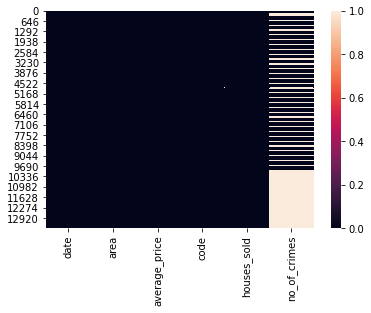

In [31]:
sns.heatmap(df.isna())

#### add new column month as second column of dataframe

In [35]:
month = df.date.dt.month

df.insert(1, 'month', month)

In [36]:
df.head()

,date,month,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN


#### what is max and min average price per year in England

In [37]:
df.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [42]:

df['year'] = df.date.dt.year

In [59]:
df1 = df[df.area == 'england']    #creating new dataframe with england as area
df1.groupby(df['year'])['average_price'].max().head()

year
1995    53901
1996    55755
1997    61564
1998    65743
1999    75071
Name: average_price, dtype: int64

#### show total no of records of each area, where average price is less than 100000

In [60]:
df.head()

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995


In [70]:
a = df[df.average_price < 100000].area.value_counts()
a

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
waltham forest           64
bexley                   64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
sutton                   54
enfield                  54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
bromley                  33
haringey                 33
inner london             31
ealing                   31
harrow                   30
kingston upon thames